<a href="https://colab.research.google.com/github/ParkStrat/Sales_Predictions/blob/main/Part3_Project1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

filename = '/content/drive/MyDrive/Coding Dojo - Data Science/01. Week 1: Python/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning (Project 1 Part 2)

In [2]:
# Using .info() to do initial assessment of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Dataframe contains
*   Columns: 12
*   Rows: 8523

The below columns are likely missing data:
*   Item_Weight (1,460 values)
*   Outlet_Size (2,410 values)


Columns

0    Item_Identifier            8523 non-null   object

 1   Item_Weight                7060 non-null   float64
 
 2   Item_Fat_Content           8523 non-null   object 
 
 3   Item_Visibility            8523 non-null   float64
 
 4   Item_Type                  8523 non-null   object 
 
 5   Item_MRP                   8523 non-null   float64
 
 6   Outlet_Identifier          8523 non-null   object 
 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 
 8   Outlet_Size                6113 non-null   object 
 
 9   Outlet_Location_Type       8523 non-null   object 
 
 10  Outlet_Type                8523 non-null   object 
 
 11  Item_Outlet_Sales          8523 non-null   float64





In [3]:
# Checking to see if there are any duplicates in the data set
df.duplicated().any()

False

Dataframe contains no duplicates

In [4]:
# Assessing other data associated with missing Outlet Size information
missingSize_filter = df.loc[df['Outlet_Size'].isna()]
missingSize_filter.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [5]:
missingSize_filter['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [6]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

The below Outlets have no indication of outlet size:

*   OUT010 (missing 555 of 555 entries)
*   OUT017 (missing 926 of 926 entries)
*   OUT045 (missing 930 of 930 entires)





In [7]:
missingWeight_slice = df.loc[df['Item_Weight'].isna()]
missingWeight_slice.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [8]:
missingWeight_slice['Outlet_Identifier'].value_counts()

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [9]:
df.loc[5:22, 'Item_Weight']

5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
20    18.850
21       NaN
22    14.600
Name: Item_Weight, dtype: float64

The below Outlets have no items weights :

*   OUT019 (missing 528 of 528 entries)
*   OUT027 (missing 935 of 935 entries)

Since item properties will likely be critical in the analysis I will be doing for the retailer and since the surrounding data cannot be used to extrapolate a reasonable weight for the missing data, I will remove all the rows for Outlets OUT019 and OUT027 to ensure that only complete data on item specification exists in the dataframe  

In [10]:
df.shape

(8523, 12)

In [11]:
df_minus_Weight = df.loc[~df['Item_Weight'].isna()]
df_minus_Weight.shape

(7060, 12)

In [12]:
df_minus_Weight['Item_Weight'].isna().sum()

0

All the rows without Item_Weight, removed from the dataframe

In [13]:
grocery_filter = df['Outlet_Type'] == 'Grocery Store' 

In [14]:
grocery_slice = df[grocery_filter]
grocery_slice.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868


In [15]:
grocery_slice['Outlet_Identifier'].value_counts()

OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Only OUT010 and OUT019 are grocery stores. There is no way other than requesting more data to determine the store size for OUT010, OUT019, and OUT045.

In [16]:
df_minus_size = df.loc[~df['Outlet_Size'].isna()]
df_minus_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [17]:
# Filter out missing item weights and store sizes
df = df_minus_Weight.loc[~df_minus_Weight['Outlet_Size'].isna()]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


All rows with missing data removed

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [20]:
# Correcting spelling / abbreviation errors for Item_Fat_Content
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
# Confirming correction
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Item_Type'].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [23]:
df['Outlet_Location_Type'].value_counts()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


All categories of data are now consistant

The below sections calculate the min, max, and mean of a numerical columns in the dataframe

In [25]:
df['Item_Weight'].describe()

count    4650.000000
mean       12.898675
std         4.670973
min         4.555000
25%         8.770000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [26]:
df['Item_Visibility'].describe()

count    4650.000000
mean        0.060700
std         0.044607
min         0.000000
25%         0.025968
50%         0.049655
75%         0.088736
max         0.188323
Name: Item_Visibility, dtype: float64

In [27]:
df['Item_MRP'].describe()

count    4650.000000
mean      141.716328
std        62.420534
min        31.490000
25%        94.409400
50%       142.979900
75%       186.614150
max       266.888400
Name: Item_MRP, dtype: float64

In [28]:
df['Outlet_Establishment_Year'].describe()

count    4650.000000
mean     1999.190538
std         7.388800
min      1987.000000
25%      1997.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [29]:
df['Item_Outlet_Sales'].describe()

count     4650.000000
mean      2272.037489
std       1497.964740
min         69.243200
25%       1125.202000
50%       1939.808300
75%       3111.616300
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

# Statistical Analysis (Project 1 Part 3)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


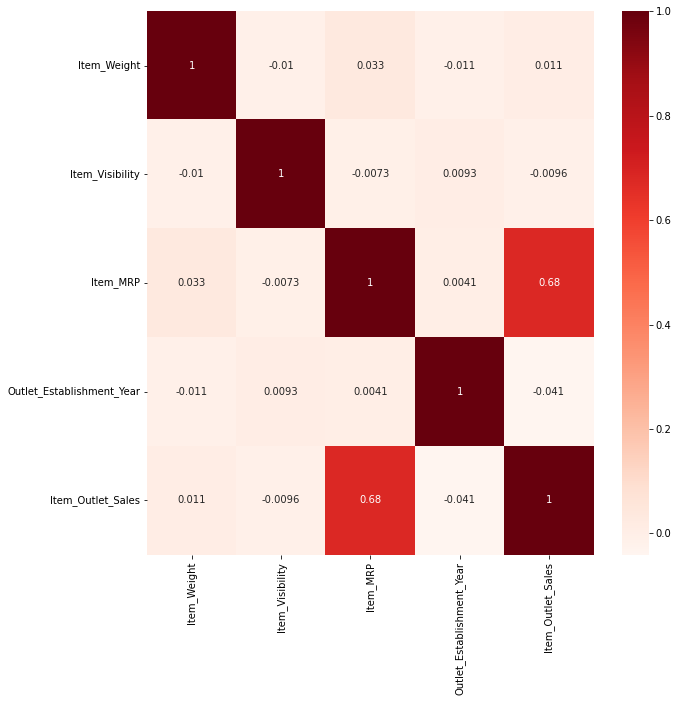

In [31]:
# Display Heatmap to assess any correlations between quanitative data
corr = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = 'Reds', annot = True);

Based on the correlation heatmap, it appears that the only quantitiative correlation is between Item_Outlet_Sales and Item_MRP (moderate correlation) 

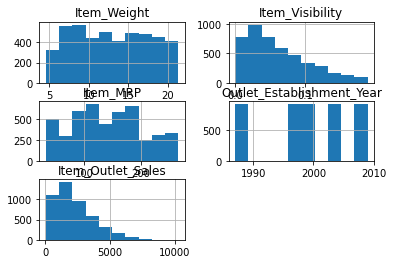

In [32]:
# Display Histograms of all quantitative data
df.hist();

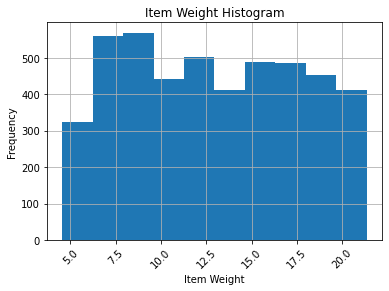

In [33]:
# Display Histogram for Item_Weight
df['Item_Weight'].hist()
plt.xticks(rotation = 45)
plt.title('Item Weight Histogram')
plt.xlabel('Item Weight')
plt.ylabel('Frequency');

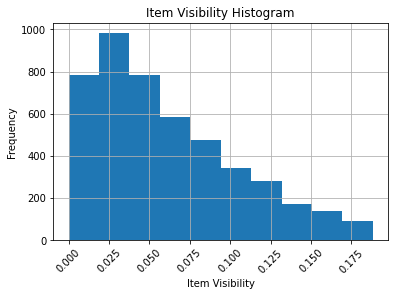

In [34]:
# Display Histogram for Item_Visibility
df['Item_Visibility'].hist()
plt.xticks(rotation = 45)
plt.title('Item Visibility Histogram')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency');

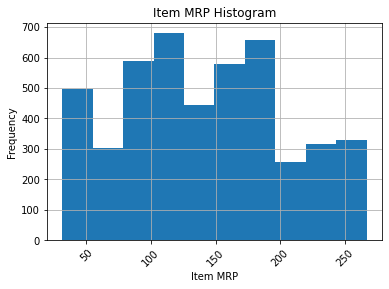

In [35]:
# Display Histoggram for Item_MRP
df['Item_MRP'].hist()
plt.title('Item MRP Histogram')
plt.xticks(rotation = 45)
plt.xlabel('Item MRP')
plt.ylabel('Frequency');

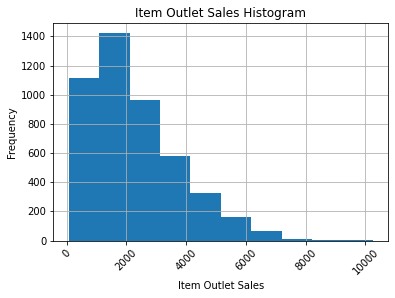

In [36]:
# Display Histogram for Item_Outlet_Sales
df['Item_Outlet_Sales'].hist()
plt.title('Item Outlet Sales Histogram')
plt.xticks(rotation = 45)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency');

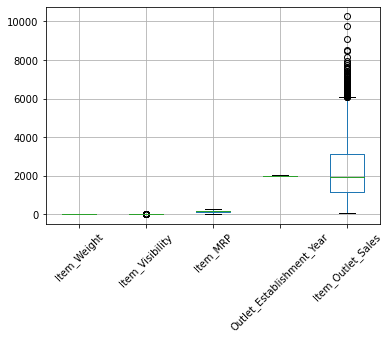

In [37]:
# Display a Boxplot for all quantitative data
df.boxplot()
plt.xticks(rotation = 45);

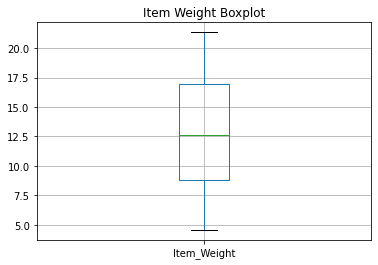

In [38]:
# Display a Boxplot for Item_Weight
df.boxplot(column = 'Item_Weight')
plt.title('Item Weight Boxplot');

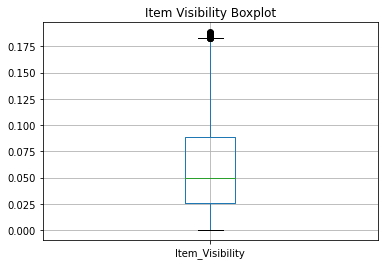

In [39]:
# Display a Boxplot for Item_Visibility
df.boxplot(column = 'Item_Visibility')
plt.title('Item Visibility Boxplot');

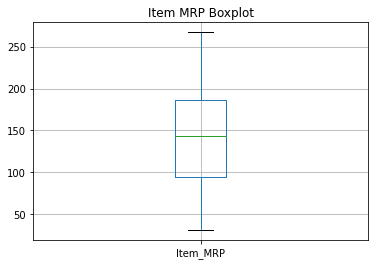

In [40]:
# Display a Boxplot for Item_MRP
df.boxplot(column = 'Item_MRP')
plt.title('Item MRP Boxplot');

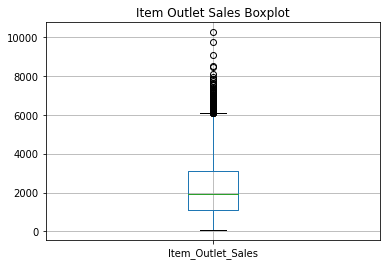

In [41]:
# Display a Boxplot for Item_Outlet_Sales
df.boxplot(column = 'Item_Outlet_Sales')
plt.title('Item Outlet Sales Boxplot');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


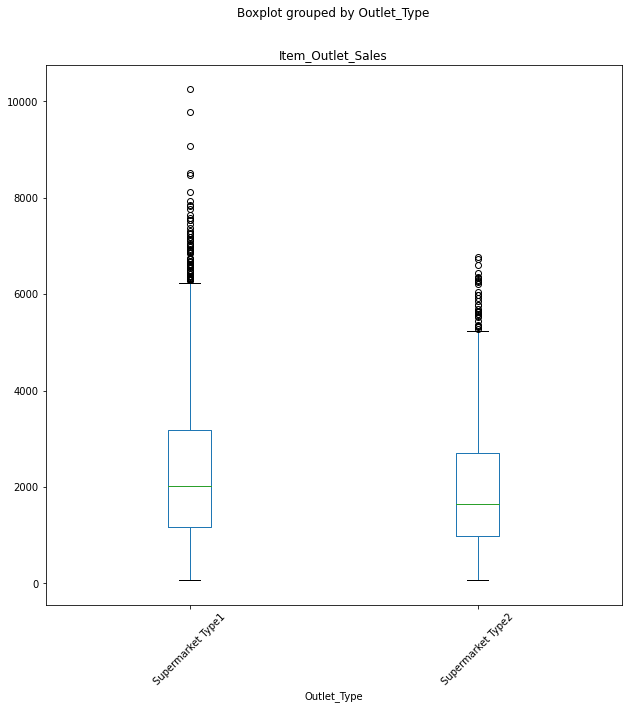

In [42]:
# Display a Boxplot comparing Outlet Type to Sales (Result - Type 1 supermarkets tend to outsell Type 2)
df.boxplot(['Item_Outlet_Sales'], by = 'Outlet_Type', figsize = (10, 10), rot = 45, grid = False);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


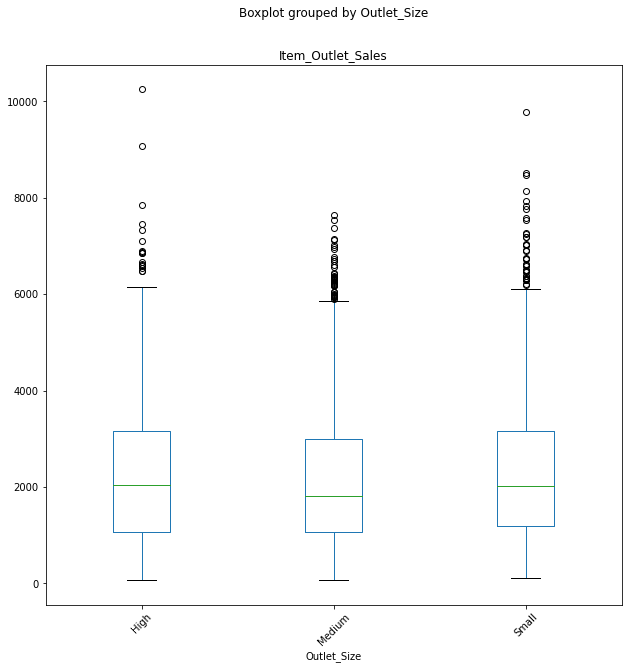

In [43]:
# Display a Boxplot comparing Outlet Size to Item Sales (result - Large and small stores tend to outsell medium sized stores)
df.boxplot(['Item_Outlet_Sales'], by = 'Outlet_Size', figsize = (10, 10), rot = 45, grid = False);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


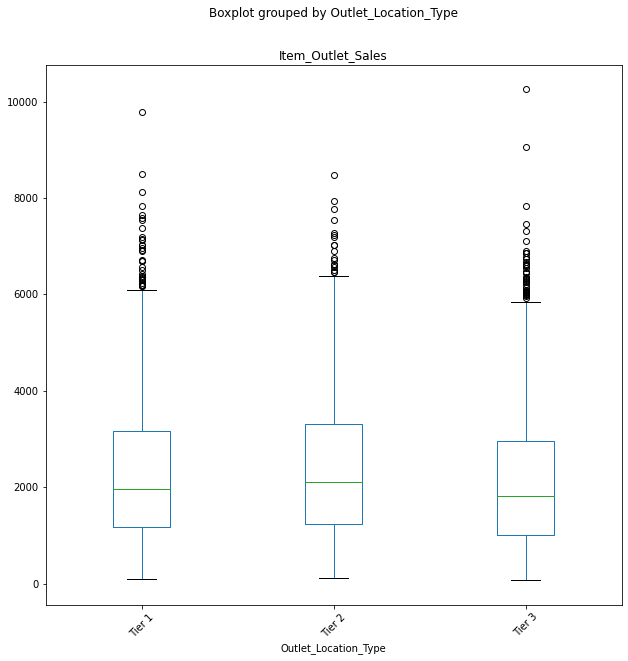

In [44]:
# Display a Boxplot comparing Outlet Location Type and Item Sales (Result - Tier 2 locations tend to sell slightly more than Tier 1 & 3)
df.boxplot(['Item_Outlet_Sales'], by = 'Outlet_Location_Type', figsize = (10, 10), rot = 45, grid = False);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


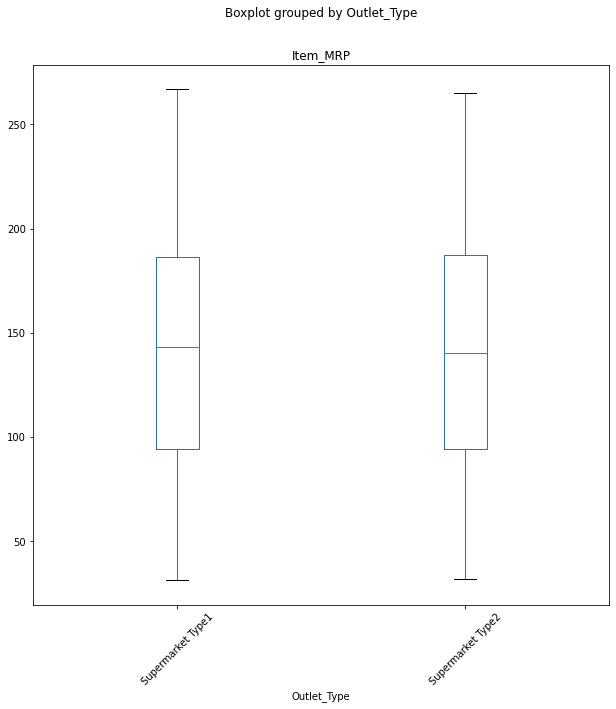

In [45]:
# Display a Boxplt compares Outlet Type and Item MRP (result - no difference)
df.boxplot(['Item_MRP'], by = 'Outlet_Type', figsize = (10, 10), rot = 45, grid = False);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


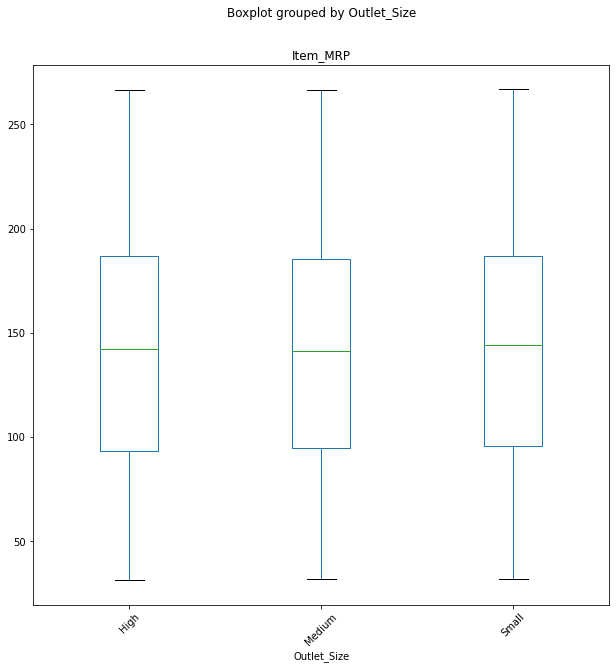

In [46]:
# Display a Boxplt compares Outlet Size and Item MRP (result - no difference)
df.boxplot(['Item_MRP'], by = 'Outlet_Size', figsize = (10, 10), rot = 45, grid = False);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


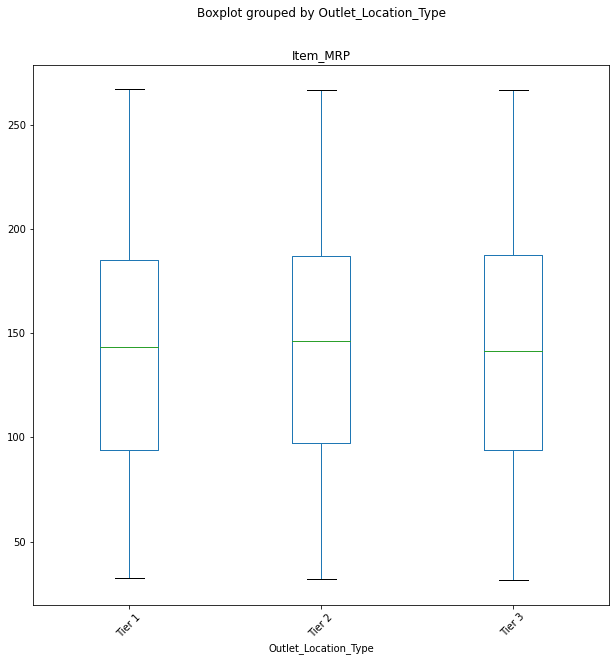

In [47]:
# Display a Boxplt compares Outlet Location and Item MRP (result - no difference)
df.boxplot(['Item_MRP'], by = 'Outlet_Location_Type', figsize = (10, 10), rot = 45, grid = False);

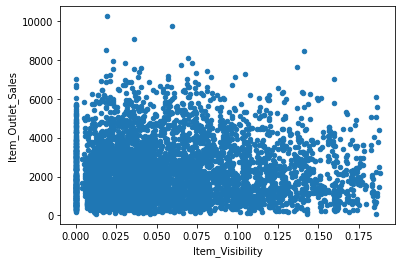

In [48]:
# Display a Scatterplot comparing Item Visibility and Outlet Sales
df.plot.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales');

In [49]:
# Imprting matlibplot.lines to draw a line and help identify a trend
import matplotlib.lines as mline

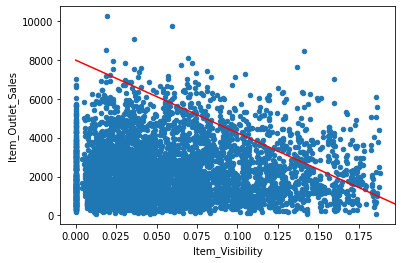

In [50]:
# Draw a rough line that seems to indicate an inversely proportional relationship between Item Visibilty and Item Sales
line = mline.Line2D([0, 0.2], [8000, 500], color = 'Red')
df.plot.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales').add_line(line);

While not identifed by the correlation coefficent, there seems to be a noticatable trend that as visibility increases, Outlet sales decrease. **I take this to mean that the wrong items are on display**.

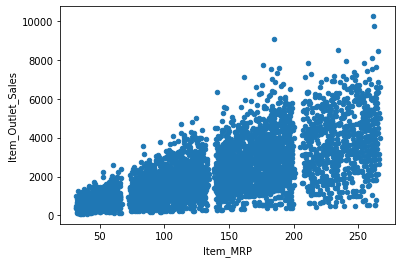

In [51]:
# Displaying a Scatterplot comparing Item MRP and Outlet Sales (identified in the Heatmap as having a moderate correlation)
df.plot.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales');

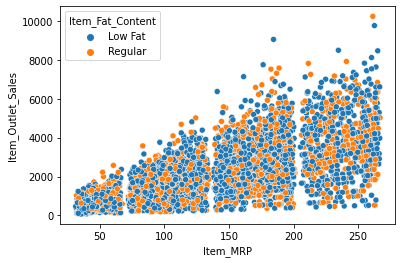

In [52]:
# Looking for some correlation between type of product and how well it sells (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content');

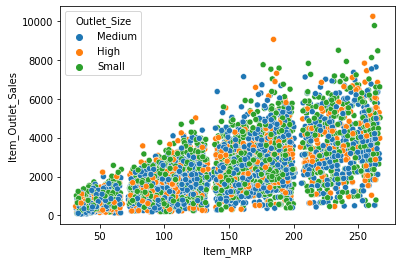

In [53]:
# Looking for some correlation between Outlet Size and how well it's products sells (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Size');

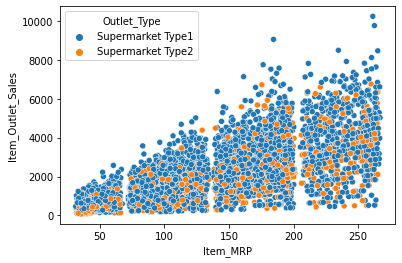

In [54]:
# Looking for some correlation between Outlet Type and how well it's products sells (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

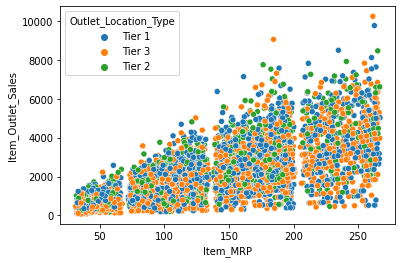

In [55]:
# Looking for some correlation between Outlet Location and how well it's products sells  (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type');

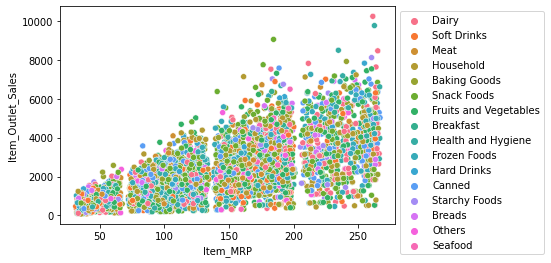

In [56]:
# Looking for some correlation between type of product and how well it sells  (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Type');
plt.legend(bbox_to_anchor = (1, 1));

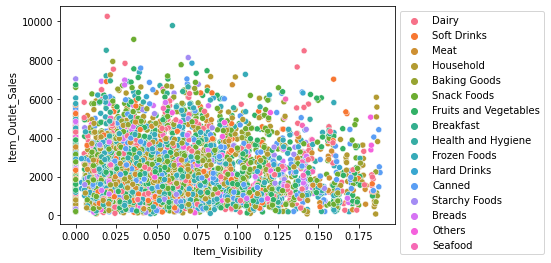

In [57]:
# Looking for some correlation between type of product, its visibility and how well it sells (result - none)
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_Type');
plt.legend(bbox_to_anchor = (1, 1));

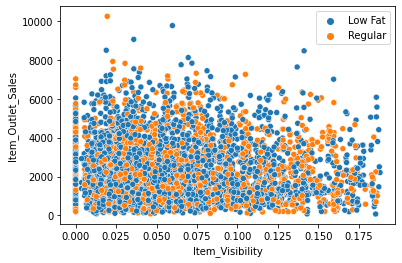

In [58]:
# Looking for some correlation between type of product, its visibility and how well it sells (result - none)
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content');
plt.legend(bbox_to_anchor = (1, 1));

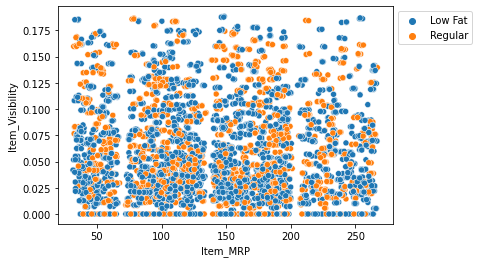

In [59]:
# Looking for some correlation between type of product, its visibility and how well it sells (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Visibility', hue = 'Item_Fat_Content');
plt.legend(bbox_to_anchor = (1, 1));

In [60]:
# Adding a column to the dataframe that identifies the quantity of each item sold
quantity_filter = df['Item_Outlet_Sales'] / df['Item_MRP']

In [61]:
df['Item_Quantity_Sold'] = quantity_filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
# Confirming proper addition of column to df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Quantity_Sold
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.828796


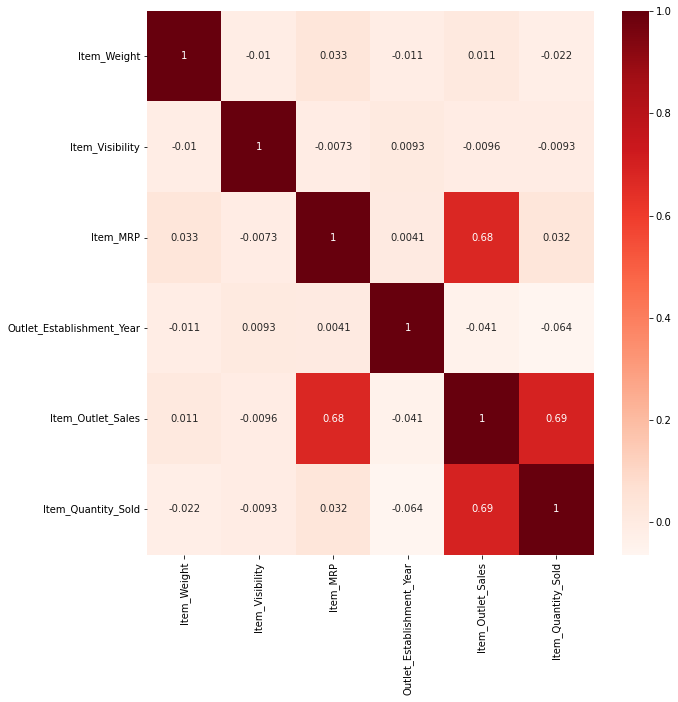

In [63]:
# Display Heatmap to assess any correlations between quanitative data
corr = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = 'Reds', annot = True);

There is a moderate correlation between Item_Quantity_Sold and Item_Outlet_Sales. I would have expeted some type of correlation between Item_Quantity_Sold and Item_Visibility, but there doesn't seem to be one based on the Heatmap.

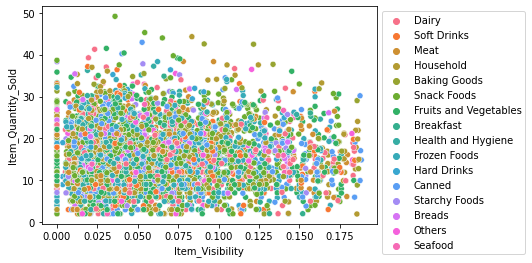

In [64]:
# Looking for some correlation between type of product, its visibility and how much it sells (result - none)
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Quantity_Sold', hue = 'Item_Type');
plt.legend(bbox_to_anchor = (1, 1));

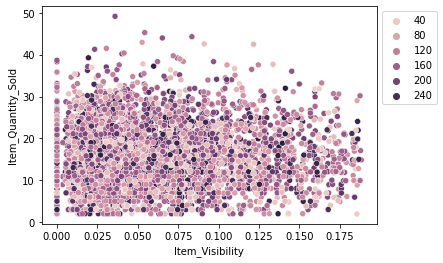

In [65]:
# Looking for some correlation between type of product, its visibility and how much it sells (result - none)
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Quantity_Sold', hue = 'Item_MRP');
plt.legend(bbox_to_anchor = (1, 1));

These scatter plots continue to indicate that Item_Visibility results in less sales

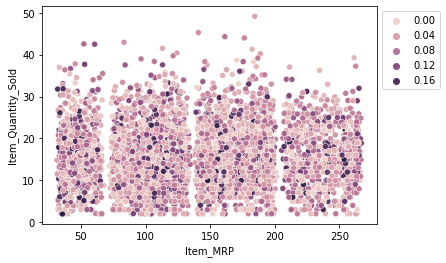

In [66]:
# Looking for some correlation between type of product MRP, its visibility and how much it sells (result - none)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Quantity_Sold', hue = 'Item_Visibility')
plt.legend(bbox_to_anchor = (1, 1));

The next three graphs show the only correlations I was able to determine with a red line drawn to help identify the trend.

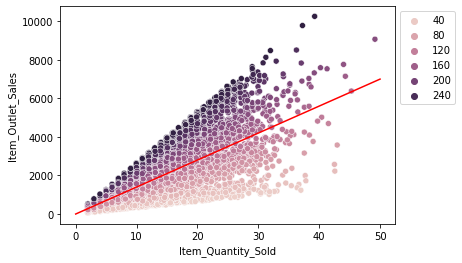

In [67]:
# Confirming the moderate correlation indicated in the Heatmap that included the Item_Quantity_Sold column 
line = mline.Line2D([0, 50], [0, 7000], color = 'Red')
sns.scatterplot(data = df, x = 'Item_Quantity_Sold', y = 'Item_Outlet_Sales', hue = 'Item_MRP').add_line(line)
plt.legend(bbox_to_anchor = (1, 1));

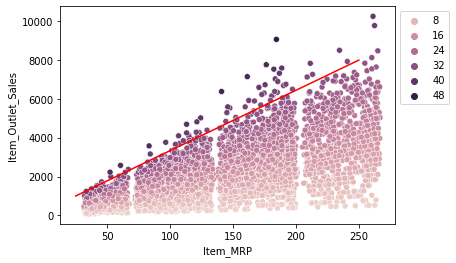

In [68]:
line = mline.Line2D([25, 250], [1000, 8000], color = 'Red')
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Quantity_Sold').add_line(line)
plt.legend(bbox_to_anchor = (1, 1));

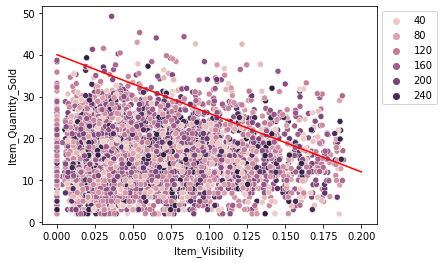

In [69]:
line = mline.Line2D([0, 0.2], [40, 12], color = 'Red')
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Quantity_Sold', hue = 'Item_MRP').add_line(line)
plt.legend(bbox_to_anchor = (1, 1));

**One would expect that if items are more visabible, they would be purchased more frequently, thus the data indicates that the wrong items are being put on display and preventing the store from maximizing its profits.**

In [73]:
# Checking to see if when divided by qalitative data, any additional information is identifiable
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [75]:
lowFat = df.loc[df['Item_Fat_Content'] == 'Low Fat']
regularFat = df.loc[df['Item_Fat_Content'] == 'Regular']

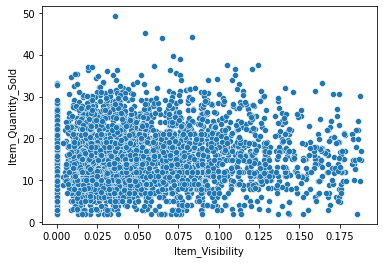

In [134]:
sns.scatterplot(data = lowFat, x = 'Item_Visibility', y = 'Item_Quantity_Sold');

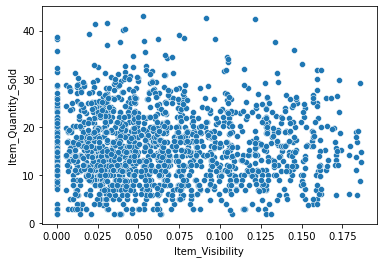

In [135]:
sns.scatterplot(data = regularFat, x = 'Item_Visibility', y = 'Item_Quantity_Sold');

In [110]:
# Creating filters for low/high item visibility and low/high item MRP to dive deeper into item visibility
lowVisibility = df['Item_Visibility'] < 0.100
highMRP = df['Item_MRP'] > 150
highVis = df['Item_Visibility'] > 0.100
lowMRP = df['Item_MRP'] < 150
lowVisHighMRP = df[lowVisibility & highMRP]
highVisLowMRP = df[highVis & lowMRP]
highVisHighMRP = df[highVis & highMRP]
lowVisLowMRP = df[lowVisibility & lowMRP]

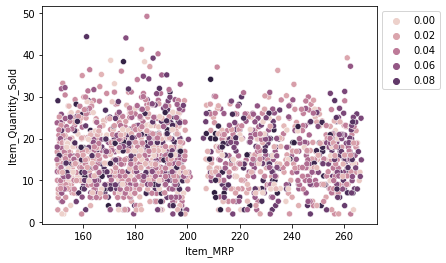

In [87]:
sns.scatterplot(data = lowVisHighMRP, x = 'Item_MRP', y = 'Item_Quantity_Sold', hue = 'Item_Visibility')
plt.legend(bbox_to_anchor = (1, 1));

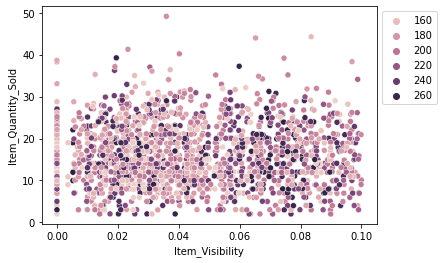

In [89]:
sns.scatterplot(data = lowVisHighMRP, x = 'Item_Visibility', y = 'Item_Quantity_Sold', hue = 'Item_MRP')
plt.legend(bbox_to_anchor = (1, 1));

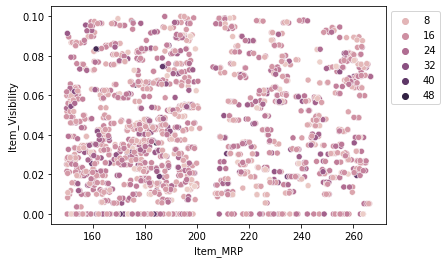

In [90]:
sns.scatterplot(data = lowVisHighMRP, x = 'Item_MRP', y = 'Item_Visibility', hue = 'Item_Quantity_Sold')
plt.legend(bbox_to_anchor = (1, 1));

In [111]:
lowVisHighMRP['Item_Quantity_Sold'].describe()

count    1733.000000
mean       16.122342
std         7.214651
min         1.984362
25%        10.961328
50%        15.839258
75%        20.877828
max        49.159356
Name: Item_Quantity_Sold, dtype: float64

In [114]:
lowVisLowMRP['Item_Quantity_Sold'].describe()

count    2009.000000
mean       15.781404
std         7.142135
min         1.953669
25%        10.829776
50%        15.070420
75%        20.262354
max        45.287406
Name: Item_Quantity_Sold, dtype: float64

In [112]:
highVisLowMRP['Item_Quantity_Sold'].describe()

count    525.000000
mean      15.593202
std        7.312804
min        1.938413
25%       10.865863
50%       14.833735
75%       19.548501
max       42.503481
Name: Item_Quantity_Sold, dtype: float64

In [113]:
highVisHighMRP['Item_Quantity_Sold'].describe()

count    383.000000
mean      16.307839
std        6.676976
min        1.986383
25%       11.867387
50%       15.939392
75%       21.065318
max       36.041641
Name: Item_Quantity_Sold, dtype: float64

In [129]:
lowVisHighMRP['Item_Quantity_Sold'].sum()

27940.018862213117

In [128]:
lowVisLowMRP['Item_Quantity_Sold'].sum()

31704.84159228656

In [121]:
highVisHighMRP['Item_Quantity_Sold'].sum()

6245.902297811033

In [136]:
highVisHighMRP['Item_Outlet_Sales'].sum()

1228341.7438

In [122]:
highVisLowMRP['Item_Quantity_Sold'].sum()

8186.43126096812

In [137]:
highVisLowMRP['Item_Outlet_Sales'].sum()

762672.5684

In [125]:
lowVisHighMRP['Item_Visibility'].mean()

0.04376393288517022

In [124]:
highVisLowMRP['Item_Visibility'].mean()

0.13262754020952375

* On average, Items with Low MRP but High Visibility use 0.13% of display space 
per item while on average, Items with High MRP and Low Visibility use about 0.04% of display space per item. 

* Items with high visibility and high MRP (total: 383) produced greater sales (1,228,341.74) than items with high visibility and low MRP (total: 525), which only had sales of 762,672.57.

* Given that item visibility is being used for less profitable items, it is worth further invesgiation to determine which of the items with low visibility and high MRP should be switched to high visibility and which items with high visibility and low MRP should be switched to low visibility.